829it [00:03, 222.44it/s]


t: 0.4126044047445055, p: 0.6592349553038587


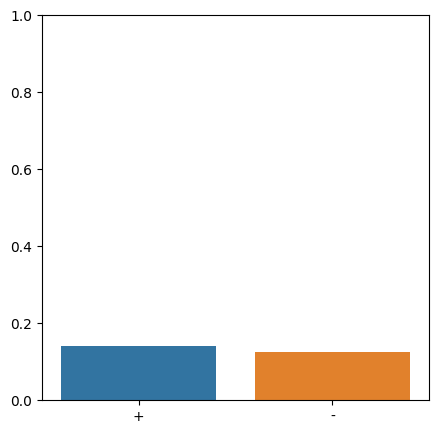

In [2]:
from lib.figure_6 import figure_6_poster_panel_d

figure_6_poster_panel_d(reset=False, mono=True)

In [3]:
from lib.figure_6 import figure_6_poster_panel_d

figure_6_poster_panel_d(reset=False, mono=False)

  0%|          | 0/29 [00:00<?, ?it/s]